# Proyectos de aprendizaje automático

La aplicación de algoritmos de aprendizaje automático, no solo consiste en entrenar algoritmos, sino que es un proceso complejo que requiere una serie de pasos, como son el preprocesado de datos, ajuste de modelos y validación. En esta práctica profundizaremos en el tratamiento de datos y veremos algunos de los algoritmos de aprendizaje automático vistos en clase.

## Carga y tratamiento de datos

En los siguientes ejercicios vamos a utilizar el conjunto de datos [Titanic](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html) para realizar distintos tipos de modificaciones en los datos: rellenado de valores ausentes y modificación de características categóricas mediante correspondencia numérica, codificación *one-hot* y escalado. El conjunto de datos Titanic contiene información sobre 1309 pasajeros del Titanic el día del naufragio, indicando 14 características como su nombre, sexo, edad, número de ticket, tarifa, puerto de embarque, clase en la que viajaba y si sobrevivió al desastre.

Para la carga y tratamiento de datos usaremos dos herramientas:
- Pandas: Librería para la manipulación de DataFrames (tablas de datos).
- Numpy: Librería para manipulación de vectores y matrices.
- Scikit-learn: Este framework, además de librerías de aprendizaje automático, también proporciona numerosas operaciones de preprocesado de datos.

El conjunto de datos está en formato CSV así que usaremos la librería Pandas para leerlo.

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic_path = ('./titanic.csv')
df = pd.read_csv(titanic_path)

Veamos las dimensiones de nuestro conjunto de datos.

In [3]:
df.shape

(1309, 14)

Para tener una idea de cómo es este conjunto de datos podemos visualizar los 5 primeros registros.

In [4]:
df[0:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


También podemos acceder a un subconjunto de columnas, dados sus nombres:

In [5]:
df[['name', 'age', 'survived']]

,name,age,survived
0,"Allen, Miss. Elisabeth Walton",29.0000,1
1,"Allison, Master. Hudson Trevor",0.9167,1
2,"Allison, Miss. Helen Loraine",2.0000,0
3,"Allison, Mr. Hudson Joshua Creighton",30.0000,0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,0
...,...,...,...
1304,"Zabour, Miss. Hileni",14.5000,0
1305,"Zabour, Miss. Thamine",NaN,0
1306,"Zakarian, Mr. Mapriededer",26.5000,0
1307,"Zakarian, Mr. Ortin",27.0000,0


Para este ejercicio utilizaremos las características clase (pclass), sexo (sex), edad (age), tarifa (fare), número de hijos y cónyuge en el barco (sibsp), camarote (cabin) y puerto de embarque (embarked), además de la variable respuesta sobre si el pasajero sobrevivió (survived). pclass es una característica numérica que puede tomar tres valores, 1, 2 o 3, correspondiendo con la clase en la que se encontraba el pasajero. age, sibsp y fare son características numéricas continuas. sex, embarked y cabin son características de tipo categórico.

In [6]:
data = df[['pclass','sex','age', 'sibsp', 'fare', 'cabin', 'embarked', 'survived']]

#### Valores ausentes en los datos

Primero vamos a analizar los datos para comprobar si existen valores ausentes y cuántos hay. Para esto usamos el método 
`isnull()` de los *dataframe* de Pandas, que crea un índice de los valores nulos; y a continuación contamos cuantos valores nulos hay para cada característica con el método `sum()`.

In [7]:
data.isnull().sum()

pclass         0
sex            0
age          263
sibsp          0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

Como podemos ver, hay una gran cantidad de valores ausentes para la característica edad y uno o dos para las características tarifa y puerto de embarque.

#### Eliminación de las filas con valores faltantes

La primera forma de tratar con valores ausentes consiste en eliminarlos. Esto es fácil de hacer usando la librería Pandas. Simplemente, hay que usar el método `dropna()` de los *dataframe* para conseguirlo.

In [8]:
data.dropna()

,pclass,sex,age,sibsp,fare,cabin,embarked,survived
0,1,female,29.0000,0,211.3375,B5,S,1
1,1,male,0.9167,1,151.5500,C22 C26,S,1
2,1,female,2.0000,1,151.5500,C22 C26,S,0
3,1,male,30.0000,1,151.5500,C22 C26,S,0
4,1,female,25.0000,1,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...
1188,3,female,24.0000,0,16.7000,G6,S,1
1189,3,female,4.0000,1,16.7000,G6,S,1
1217,3,male,19.0000,0,7.6500,F G73,S,0
1230,3,female,2.0000,0,10.4625,G6,S,0


In [9]:
data.dropna().isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
fare        0
cabin       0
embarked    0
survived    0
dtype: int64

A continuación vamos a ver medidas menos drásticas para tratar con los valores ausentes, pero antes vamos a crear un índice de los valores ausentes de la característica edad, para ver el efecto de los cambios que vamos a realizar.

In [10]:
missing = data['age'].isnull()

data[missing][0:5]

,pclass,sex,age,sibsp,fare,cabin,embarked,survived
15,1,male,NaN,0,25.9250,NaN,S,0
37,1,male,NaN,0,26.5500,NaN,S,1
40,1,male,NaN,0,39.6000,NaN,C,0
46,1,male,NaN,0,31.0000,NaN,S,0
59,1,female,NaN,0,27.7208,NaN,C,1


#### Imputación por la media o la moda

Vamos a rellenar los valores ausentes de la característica edad con la media de todos los datos disponibles. El valor de la media se puede obtener con el método `mean()` de los *dataframe*.

In [11]:
data['age'].mean()

29.8811345124283

Para rellenar los campos vacíos de una característica vamos a utilizar la clase `SimpleImputer` de la librería `impute` de *Scikit-learn*. Esta clase nos permite rellenar los campos vacíos de un conjunto de datos con distintas estrategias, como la media, la mediana o la moda.

In [12]:
from sklearn.impute import SimpleImputer

El inconveniente es que la clase `SimpleImputer` actúa sobre todo el conjunto de datos, usando la misma estrategia para rellenar todos los huecos vacíos de todas las características. Si usamos esta clase con el objetivo de rellenar los campos vacíos de la característica edad con la media, se producirá un error al tratar de rellenar los campos vacíos de características categóricas. La única estrategia válida para cualquier característica, independientemente de si es categórica o numérica, es la moda.

In [13]:
si = SimpleImputer(strategy='mean')

#si.fit(data)

*Scikit-learn* incorpora la clase `ColumnTransformer` con el objetivo de hacer transformaciones en un conjunto de datos especificando las columnas sobre las que queremos actuar. Se encuentra en la librería `compose`.

In [14]:
from sklearn.compose import ColumnTransformer

En el constructor de la clase `ColumnTransformer` hay que proporcionar una lista de ternas formadas por un nombre único asociado a la transformación para un conjunto de columnas, la transformación que queremos realizar (en este caso rellenar los campos vacíos con la media) y las columnas sobre las que queremos actuar (en este caso la característica edad). Podemos indicar varias columnas y la transformación se llevará a cabo sobre todas ellas de forma independiente.

In [15]:
ct = ColumnTransformer([("media",SimpleImputer(strategy='mean'),['age'])])

Entrenamos esta instancia de la clase `ColumnTransformer` con los datos y podemos ver el resultado sobre los ejemplos que contenían valores vacíos para la característica edad.

In [16]:
npdata = ct.fit_transform(data)

npdata[missing][0:5]

array([[29.88113451],
       [29.88113451],
       [29.88113451],
       [29.88113451],
       [29.88113451]])

Como podemos observar, se ha producido la transformación, pero hemos perdido el resto de columnas de nuestro conjunto de datos. Esto es porque la clase `ColumnTransformer` actúa sobre las características que se indican, eliminando todas las demás. Si queremos modificar este comportamiento, podemos hacerlo usando el parámetro `remainder`, que sirve para especificar qué hacer con el resto de las características, con el valor `passthrough`, que indica que se deben dejar sin modificar.

In [17]:
ct = ColumnTransformer([("media",SimpleImputer(strategy='mean'),['age'])],
                        remainder='passthrough')

npdata = ct.fit_transform(data)

npdata[missing][0:5]

array([[29.8811345124283, 1, 'male', 0, 25.925, nan, 'S', 0],
       [29.8811345124283, 1, 'male', 0, 26.55, nan, 'S', 1],
       [29.8811345124283, 1, 'male', 0, 39.6, nan, 'C', 0],
       [29.8811345124283, 1, 'male', 0, 31.0, nan, 'S', 0],
       [29.8811345124283, 1, 'female', 0, 27.7208, nan, 'C', 1]],
      dtype=object)

Otra cosa que observamos ahora es que se ha alterado el orden de las características. Esto se debe a que la clase `ColumnTransformer` deja las características en el orden en que se indican en la lista de transformaciones. Si queremos mantener el orden original, deberíamos indicar una transformación nula para el resto de características distintas de la edad, en el orden que queramos mantener. La transformación nula se indica usando el valor `'passthrough'` como segundo campo de las ternas que indican cómo actuar sobre las columnas.

In [18]:
ct = ColumnTransformer([("original1",'passthrough',['pclass','sex']),
                        ("media",SimpleImputer(strategy='mean'),['age']),
                        ("original2",'passthrough',['fare','embarked'])])

npdata = ct.fit_transform(data)

In [19]:
print(ct.transform(data)[missing])

[[1 'male' 29.8811345124283 25.925 'S']
 [1 'male' 29.8811345124283 26.55 'S']
 [1 'male' 29.8811345124283 39.6 'C']
 ...
 [3 'male' 29.8811345124283 7.225 'C']
 [3 'male' 29.8811345124283 14.4583 'C']
 [3 'female' 29.8811345124283 14.4542 'C']]


Vamos ahora a rellenar valores ausentes usando otro criterio, en concreto la mediana para la característica tarifa. La mediana de un conjunto de datos se puede obtener con el método `median()` de los *dataframe*.

In [20]:
data['fare'].median()

14.4542

Hacer esta modificación es tan simple como indicarla en una instancia de la clase `ColumnTransformer` sobre el dato correspondiente. En este caso ampliamos la instancia anterior para hacer esta segunda modificación.

In [21]:
ct = ColumnTransformer([("original1",'passthrough',['pclass','sex']),
                         ("si1",SimpleImputer(strategy='mean'),['age']),
                         ("si2",SimpleImputer(strategy='median'),['fare']),
                         ("original2",'passthrough',['embarked'])])

npdata = ct.fit_transform(data)

A continuación, vamos a rellenar los valores ausentes de la característica puerto de embarque con la moda. La moda de un conjunto de datos se puede obtener con el método `mode()` de los *dataframe*. En el resultado se muestran todos los valores que tiene un máximo de frecuencia de aparición en el conjunto de datos.

In [22]:
data['embarked'].mode()

0    S
Name: embarked, dtype: object

Finalmente, incluimos esta transformación para la característica puerto de embarque en la instancia de la clase `ColumnTransformer`. Una vez hecho esto, entrenamos la clase con nuestro conjunto de datos y creamos una versión modificada para usarla en el resto de esta hoja de trabajo.

In [23]:
data.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'fare', 'cabin', 'embarked',
       'survived'],
      dtype='object')

In [24]:
ct = ColumnTransformer([("original1",'passthrough',['pclass','sex']),
                        ("si1",SimpleImputer(strategy='mean'),['age']),
                        ("original2",'passthrough',['sibsp']),
                        ("si2",SimpleImputer(strategy='median'),['fare']),
                        ("original3",'passthrough',['cabin']),
                        ("si3",SimpleImputer(strategy='most_frequent'),['embarked']),
                        ("original4",'passthrough',['survived'])])
npdata = ct.fit_transform(data)
npdata

array([[1, 'female', 29.0, ..., 'B5', 'S', 1],
       [1, 'male', 0.9167, ..., 'C22 C26', 'S', 1],
       [1, 'female', 2.0, ..., 'C22 C26', 'S', 0],
       ...,
       [3, 'male', 26.5, ..., nan, 'C', 0],
       [3, 'male', 27.0, ..., nan, 'C', 0],
       [3, 'male', 29.0, ..., nan, 'S', 0]], dtype=object)

El método anterior devuelve un tipo de datos diferente, una matriz de Numpy. Sin entrar en detalles, vamos a ver como volver a convertirlo en DataFrame de Pandas.

In [25]:
data2 = pd.DataFrame(npdata, columns=data.columns)
data2

,pclass,sex,age,sibsp,fare,cabin,embarked,survived
0,1,female,29.0,0,211.3375,B5,S,1
1,1,male,0.9167,1,151.55,C22 C26,S,1
2,1,female,2.0,1,151.55,C22 C26,S,0
3,1,male,30.0,1,151.55,C22 C26,S,0
4,1,female,25.0,1,151.55,C22 C26,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,14.4542,NaN,C,0
1305,3,female,29.881135,1,14.4542,NaN,C,0
1306,3,male,26.5,0,7.225,NaN,C,0
1307,3,male,27.0,0,7.225,NaN,C,0


Veamos como ha quedado nuestro conjunto de datos

In [26]:
data2.isnull().sum()

pclass         0
sex            0
age            0
sibsp          0
fare           0
cabin       1014
embarked       0
survived       0
dtype: int64

La columna cabin tiene muchos valores perdidos y no nos interesa, veamos como eliminarla

In [27]:
data2 = data2.drop(['cabin'],axis=1)
data2

,pclass,sex,age,sibsp,fare,embarked,survived
0,1,female,29.0,0,211.3375,S,1
1,1,male,0.9167,1,151.55,S,1
2,1,female,2.0,1,151.55,S,0
3,1,male,30.0,1,151.55,S,0
4,1,female,25.0,1,151.55,S,0
...,...,...,...,...,...,...,...
1304,3,female,14.5,1,14.4542,C,0
1305,3,female,29.881135,1,14.4542,C,0
1306,3,male,26.5,0,7.225,C,0
1307,3,male,27.0,0,7.225,C,0


In [28]:
data2.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
fare        0
embarked    0
survived    0
dtype: int64

Ya hemos terminado la primera fase de preparación de los datos

#### Manipulando matrices de numpy

De momento seguiremos trabajando con la matriz X, ya que nos facilita el acceso a los datos mediante índices

In [29]:
npdata

array([[1, 'female', 29.0, ..., 'B5', 'S', 1],
       [1, 'male', 0.9167, ..., 'C22 C26', 'S', 1],
       [1, 'female', 2.0, ..., 'C22 C26', 'S', 0],
       ...,
       [3, 'male', 26.5, ..., nan, 'C', 0],
       [3, 'male', 27.0, ..., nan, 'C', 0],
       [3, 'male', 29.0, ..., nan, 'S', 0]], dtype=object)

In [30]:
npdata[0,0]

1

El primer índice se refiere a las filas y el segundo a las columnas.

In [31]:
npdata[0,1]

'female'

También podemos usar rangos mediante el operador `:`. Recordemos que si no especificamos un valor a la izquierda, significa `desde el principio` y a la derecha, `hasta el final`. Por último, recordemos que siempre se excluye el límite superior (el último elemento es límite -1).

In [32]:
npdata[:5,1]

array(['female', 'male', 'female', 'male', 'female'], dtype=object)

In [33]:
npdata[:,1]

array(['female', 'male', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [34]:
npdata[:,:4]

array([[1, 'female', 29.0, 0],
       [1, 'male', 0.9167, 1],
       [1, 'female', 2.0, 1],
       ...,
       [3, 'male', 26.5, 0],
       [3, 'male', 27.0, 0],
       [3, 'male', 29.0, 0]], dtype=object)

### Características categóricas

Vamos a tratar ahora con transformaciones de variables categóricas: correspondencia numérica y codificación *one-hot*. La mayoría de las variables categóricas, especialmente las nominales, se proporcionan como texto y es necesario convertirlas a formato numérico. 

Existen dos tipos de variables categóricas:
- **Ordinales:** Tienen un orden implícito. Por ejemplo, calificaciones (suspendo, aprobado, notable, sobresaliente), niveles (alto, medio, bajo) o la clase en la que viajan (`pclass`) en el caso del Titanic. Nótese, que es frecuente que estas variables ya vengan codificadas como números, como es el caso de `pclass`, en cuyo caso, no es obligatorio aplicar ningún tratamiento. En caso de que sean presentadas como texto, será necesario transformar las categorías a números, manteniendo el orden de los valores. Por ejemplo, una codificación válida sería [alto=1, medio=2, bajo=3] (el orden inverso sería igualmente válido), mientras que si codificamos esa variable como [alto=2, medio=3, bajo=1]. Las variables Ordinales también pueden ser transformadas en columnas binarias mediante one-hot encoding, sin embargo, es preferible presentarlas como una sola columna numérica.
- **Nominales:** No tienen orden implícito. Por ejemplo, un color, una marca o `embarked` en el caso del Titanic. Es posible transformar las variables nominales en columna numérica, asignando un orden cualquiera, sin embargo, esto **solo funcionará correctamente con modelos basados en árboles**. **Para cualquier otra técnica es recomendable realizar one-hot encoding sobre las variables nominales**.

**Variable respuesta:** La variable respuesta es un caso especial. Aunque sea nominal, siempre trabajaremos con una columna numérica, es decir, realizamos una asignación cualquiera de valores a las categorías.

### LabelEncoder

#### Pasando a numérico la variable respuesta. Necesario cuando trabajamos con la variable respuesta por separado.

En *Scikit-learn* podemos hacer una correspondencia numérica con la clase `LabelEncoder` de la librería `preprocessing`. Al entrenar una instancia de esta clase con un conjunto de datos, se identifican los valores o clases que existen y, posteriormente, se pueden reemplazar por valores numéricos. Normalmente, usamos `LabelEncoder` cuando la variable respuesta está fuera de la tabla.

Nótese que esta operación está pensada para convertir una variable respuesta nominal (que se presenta en formato texto) a numérica. Como nuestra variable respuesta ya es una variable numérica, vamos a utilizar la variable `embarked` como ejemplo.

In [35]:
y = data2['embarked']
y

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

Podemos ver el conjunto de valores que toma una característica con el método `unique()` de los *dataframe*. En este caso podemos comprobar que la característica puerto de embarque toma tres valores.

In [36]:
y.unique()

array(['S', 'C', 'Q'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y)

LabelEncoder()

El conjunto de clases identificadas se almacena en el campo `classes_`

In [38]:
print(le.classes_)

['C' 'Q' 'S']


Ahora podemos transformar los datos originales

In [39]:
y_num = le.transform(y)
y_num

array([2, 2, 2, ..., 0, 0, 2])

Para aplicar la correspondencia numérica dentro de la estructura de preprocesado `ColumnTransformer`, podemos usar `OrdinalEncoder`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

### OneHotEncoder

La codificación *one-hot* se consigue utilizando la clase `OneHotEncoder` de la librería `preprocessing`. En este caso podemos integrar esta transformación como un modificador de una instancia de la clase `ColumnTransformer` sobre las columnas que nos interesen. Vamos a hacerlo primero sobre la característica sexo.

Para la mayoría de algoritmos, esta es la forma más adecuada de trabajar con variables categóricas. Esta técnica solo será un inconveniente en situaciones en las que tengamos un número elevado de variables categóricas con muchos valores distintos cada una, lo que hará que se generen un gran número de nuevas variables.

En primer lugar, vamos a transformar la variable `sex`

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([("original1",'passthrough',['pclass']),
                        ("ohe",OneHotEncoder(),['sex']),
                        ("si1",SimpleImputer(strategy='mean'),['age']),
                        ("original2",'passthrough',['sibsp']),
                        ("si2",SimpleImputer(strategy='median'),['fare']),
#                         ("original3",'passthrough',['cabin']), # eliminamos cabin
                        ("si3",SimpleImputer(strategy='most_frequent'),['embarked']),
                        ("original4",'passthrough',['survived'])])

npdata = ct.fit_transform(data)
npdata

array([[1, 1.0, 0.0, ..., 211.3375, 'S', 1],
       [1, 0.0, 1.0, ..., 151.55, 'S', 1],
       [1, 1.0, 0.0, ..., 151.55, 'S', 0],
       ...,
       [3, 0.0, 1.0, ..., 7.225, 'C', 0],
       [3, 0.0, 1.0, ..., 7.225, 'C', 0],
       [3, 0.0, 1.0, ..., 7.875, 'S', 0]], dtype=object)

In [41]:
print(npdata[0:5])

[[1 1.0 0.0 29.0 0 211.3375 'S' 1]
 [1 0.0 1.0 0.9167 1 151.55 'S' 1]
 [1 1.0 0.0 2.0 1 151.55 'S' 0]
 [1 0.0 1.0 30.0 1 151.55 'S' 0]
 [1 1.0 0.0 25.0 1 151.55 'S' 0]]


Vamos a repetir la operación para la variable `embarked`.

**Multiples operaciones sobre una columna mediante Pipelines**

Hacer lo mismo sobre la característica puerto de embarque no es tan simple, puesto que ya habíamos indicado una modificación para esta característica. Para conseguir hacer una segunda modificación sobre una característica vamos a usar la clase `Pipeline` de la librería `pipeline`. Con esta clase podemos indicar una secuencia de transformaciones a realizar sobre un conjunto de datos. Estas transformaciones se realizan de forma secuencial sobre los datos e incluso se podría indicar como paso final un modelo de decisión. En nuestro caso, creamos una instancia de la clase `Pipeline` para rellenar primero los valores ausentes con el valor más frecuente (la moda) y después hacemos una codificación *one-hot*.

A continuación, usamos la instancia de la clase `Pipeline` que acabamos de crear como transformador asociado a la característica puerto de embarque en una instancia de la clase `ColumnTransformer`.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

impohe = Pipeline([('si3', SimpleImputer(strategy='most_frequent')),
                   ('onehot', OneHotEncoder())])

ct = ColumnTransformer([("original1",'passthrough',['pclass']),
                        ("ohe",OneHotEncoder(),['sex']),
                        ("si1",SimpleImputer(strategy='mean'),['age']),
                        ("original2",'passthrough',['sibsp']),
                        ("si2",SimpleImputer(strategy='median'),['fare']),
#                         ("original3",'passthrough',['cabin']), # eliminamos cabin
                        ("impohe",impohe,['embarked']),
                        ("original4",'passthrough',['survived'])])

npdata = ct.fit_transform(data)
npdata

array([[1., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [3., 0., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 1., 0.]])

In [43]:
print(npdata[0:5])

[[  1.       1.       0.      29.       0.     211.3375   0.       0.
    1.       1.    ]
 [  1.       0.       1.       0.9167   1.     151.55     0.       0.
    1.       1.    ]
 [  1.       1.       0.       2.       1.     151.55     0.       0.
    1.       0.    ]
 [  1.       0.       1.      30.       1.     151.55     0.       0.
    1.       0.    ]
 [  1.       1.       0.      25.       1.     151.55     0.       0.
    1.       0.    ]]


In [44]:
data

,pclass,sex,age,sibsp,fare,cabin,embarked,survived
0,1,female,29.0000,0,211.3375,B5,S,1
1,1,male,0.9167,1,151.5500,C22 C26,S,1
2,1,female,2.0000,1,151.5500,C22 C26,S,0
3,1,male,30.0000,1,151.5500,C22 C26,S,0
4,1,female,25.0000,1,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,14.4542,NaN,C,0
1305,3,female,NaN,1,14.4542,NaN,C,0
1306,3,male,26.5000,0,7.2250,NaN,C,0
1307,3,male,27.0000,0,7.2250,NaN,C,0


Al crear nuevas variables con OneHotEncoding ya es más complicado volver a la tabla con nombres original. Tendríamos que asignarle nombres a las nuevas variables manualmente:

In [45]:
colnames = ['pclass', 'sex=female', 'sex=male', 'age', 'sibsp', 'fare', 
            'embarked=C', 'embarked=Q', 'embarked=S', 'survived']

In [46]:
data3 = pd.DataFrame(npdata, columns=colnames)
data3

,pclass,sex=female,sex=male,age,sibsp,fare,embarked=C,embarked=Q,embarked=S,survived
0,1.0,1.0,0.0,29.000000,0.0,211.3375,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.916700,1.0,151.5500,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,2.000000,1.0,151.5500,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,30.000000,1.0,151.5500,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,25.000000,1.0,151.5500,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,1.0,0.0,14.500000,1.0,14.4542,1.0,0.0,0.0,0.0
1305,3.0,1.0,0.0,29.881135,1.0,14.4542,1.0,0.0,0.0,0.0
1306,3.0,0.0,1.0,26.500000,0.0,7.2250,1.0,0.0,0.0,0.0
1307,3.0,0.0,1.0,27.000000,0.0,7.2250,1.0,0.0,0.0,0.0


### OrdinalEncoding

Para transformar variables nominales en numéricas, podemos usar `OrdinalEncoder`. Al igual que el resto de operaciones, está diseñada para procesar todas las columnas que reciba, por lo que debemos usarla junto con `ColumnTransformer`. Adicionalmente, `OrdinalEncoder` permite proporcionar la correspondencia numérica para las variables categóricas ordinales. Por tanto, `OrdinalEncoder` realiza la misma operación que `LabelEncoder`, sin embargo, dado que `LabelEncoder` está pensado para trabajar con la variable respuesta, no se integra con ColumnTransformer y no permite definir la correspondencia numérica (usará una cualquiera).

En este ejemplo, dado que no tenemos ninguna variable ordinal de tipo texto, vamos a aplicar  `OrdinalEncoder` a las variables `sex` y `embarked`.

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

impohe = Pipeline([('si3', SimpleImputer(strategy='most_frequent')),
                   ('onehot', OrdinalEncoder(categories=[['S', 'C', 'Q']]))]) 
# Se ha definido la siguiente codificación: S=0, C=1, Q=2

ct = ColumnTransformer([("original1",'passthrough',['pclass']),
                        ("ohe",OrdinalEncoder(),['sex']), # No se especifica codificación
                        ("si1",SimpleImputer(strategy='mean'),['age']),
                        ("original2",'passthrough',['sibsp']),
                        ("si2",SimpleImputer(strategy='median'),['fare']),
                        ("impohe",impohe,['embarked']),
                        ("original4",'passthrough',['survived'])])

npdata = ct.fit_transform(data)
npdata

array([[  1.    ,   0.    ,  29.    , ..., 211.3375,   0.    ,   1.    ],
       [  1.    ,   1.    ,   0.9167, ..., 151.55  ,   0.    ,   1.    ],
       [  1.    ,   0.    ,   2.    , ..., 151.55  ,   0.    ,   0.    ],
       ...,
       [  3.    ,   1.    ,  26.5   , ...,   7.225 ,   1.    ,   0.    ],
       [  3.    ,   1.    ,  27.    , ...,   7.225 ,   1.    ,   0.    ],
       [  3.    ,   1.    ,  29.    , ...,   7.875 ,   0.    ,   0.    ]])

In [48]:
print(npdata[0:5])

[[  1.       0.      29.       0.     211.3375   0.       1.    ]
 [  1.       1.       0.9167   1.     151.55     0.       1.    ]
 [  1.       0.       2.       1.     151.55     0.       0.    ]
 [  1.       1.      30.       1.     151.55     0.       0.    ]
 [  1.       0.      25.       1.     151.55     0.       0.    ]]


In [49]:
colnames = ['pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked', 'survived']

In [50]:
data4 = pd.DataFrame(npdata, columns=colnames)
data4

,pclass,sex,age,sibsp,fare,embarked,survived
0,1.0,0.0,29.000000,0.0,211.3375,0.0,1.0
1,1.0,1.0,0.916700,1.0,151.5500,0.0,1.0
2,1.0,0.0,2.000000,1.0,151.5500,0.0,0.0
3,1.0,1.0,30.000000,1.0,151.5500,0.0,0.0
4,1.0,0.0,25.000000,1.0,151.5500,0.0,0.0
...,...,...,...,...,...,...,...
1304,3.0,0.0,14.500000,1.0,14.4542,1.0,0.0
1305,3.0,0.0,29.881135,1.0,14.4542,1.0,0.0
1306,3.0,1.0,26.500000,0.0,7.2250,1.0,0.0
1307,3.0,1.0,27.000000,0.0,7.2250,1.0,0.0


**Importante:** De aquí en adelante, seguiremos trabajando con la versión anterior del conjunto de operaciones de preprocesado, es decir, la que aplica one-hot encoding a las variables `sex`y `embarked`.

### Diescretizado de variables numéricas

Una estrategia interesante para eliminar ruido de un atributo, es la discretización de variables continuas usando rangos. Opcionalmente, podemos convertir esta variable discretizada a one-hot, sin embargo, esto no es necesario, ya que una variable numérica discretizada siempre será ordinal.

Para esto, scikit learn nos proporciona `KBinsDiscretizer`. Este método permite, por un lado, seleccionar el tipo de discretización que queremos hacer (por rango, por frecuencia, etc.) y por otro, decidir como representar el resultado (ordinal, one-hot, etc.).

Vamos a crear versiones discretas de las variables `age` y `fare`. En este caso vamos a dejar la variable original y la discretizada para luego ver, mediante métodos de selección de características, cuál tiene más poder predictivo. En caso contrario, lo normal sería sustituir la variable original por la discretizada.

In [51]:
from sklearn.preprocessing import KBinsDiscretizer

impohe = Pipeline([('si3', SimpleImputer(strategy='most_frequent')),
                   ('onehot', OneHotEncoder())])

impdisc_age = Pipeline([("si1", SimpleImputer(strategy='mean')),
                   ('disc1', KBinsDiscretizer(8, strategy='uniform', encode='ordinal'))])

impdisc_fare = Pipeline([("si2", SimpleImputer(strategy='median')),
                   ('disc2', KBinsDiscretizer(6, strategy='quantile', encode='ordinal'))])

ct = ColumnTransformer([("original1",'passthrough',['pclass']),
                        ("ohe",OneHotEncoder(),['sex']),
                        ("si1",SimpleImputer(strategy='mean'),['age']), # age
                        ("disc_age",impdisc_age,['age']), # age_range
                        ("original2",'passthrough',['sibsp']),
                        ("si2",SimpleImputer(strategy='median'),['fare']), # fare
                        ("disc_fare",impdisc_fare,['fare']), # fare_range
                        ("impohe",impohe,['embarked']),
                        ("original4",'passthrough',['survived'])])

npdata = ct.fit_transform(data)
npdata

array([[1., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [3., 0., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 1., 0.]])

In [52]:
print(npdata[0:5])

[[  1.       1.       0.      29.       2.       0.     211.3375   5.
    0.       0.       1.       1.    ]
 [  1.       0.       1.       0.9167   0.       1.     151.55     5.
    0.       0.       1.       1.    ]
 [  1.       1.       0.       2.       0.       1.     151.55     5.
    0.       0.       1.       0.    ]
 [  1.       0.       1.      30.       2.       1.     151.55     5.
    0.       0.       1.       0.    ]
 [  1.       1.       0.      25.       2.       1.     151.55     5.
    0.       0.       1.       0.    ]]


In [53]:
colnames = ['pclass', 'sex=female', 'sex=male', 'age', 'age_range', 'sibsp', 'fare', 
            'fare_range', 'embarked=C', 'embarked=Q', 'embarked=S', 'survived']

In [54]:
data5 = pd.DataFrame(npdata, columns=colnames)
data5

,pclass,sex=female,sex=male,age,age_range,sibsp,fare,fare_range,embarked=C,embarked=Q,embarked=S,survived
0,1.0,1.0,0.0,29.000000,2.0,0.0,211.3375,5.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.916700,0.0,1.0,151.5500,5.0,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,2.000000,0.0,1.0,151.5500,5.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,30.000000,2.0,1.0,151.5500,5.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,25.000000,2.0,1.0,151.5500,5.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,1.0,0.0,14.500000,1.0,1.0,14.4542,3.0,1.0,0.0,0.0,0.0
1305,3.0,1.0,0.0,29.881135,2.0,1.0,14.4542,3.0,1.0,0.0,0.0,0.0
1306,3.0,0.0,1.0,26.500000,2.0,0.0,7.2250,0.0,1.0,0.0,0.0,0.0
1307,3.0,0.0,1.0,27.000000,2.0,0.0,7.2250,0.0,1.0,0.0,0.0,0.0


# Aprendizaje supervisado - Titanic

El paquete de _Python_ [scikit-learn](http://scikit-learn.org) (_sklearn_ en lo que sigue) proporciona un marco de trabajo para el aprendizaje automático.

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, SCORERS

Para ilustrar las diferentes técnicas de aprendizaje supervisado vistas en clase vamos a usar el conjunto de datos sobre el titanic que acabamos de preparar.

Recuperamos nuestro conjunto de datos preprocesado en formato numpy:

In [56]:
npdata

array([[1., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [3., 0., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 1., 0.]])

La variable respuesta, *survived*, es binaria y se encuentra en última posición. Recordemos que aplicar cualquier algoritmo de scikit-learn debemos separar la variable objetivo de los atributos o variables predictoras:

In [57]:
y_titanic = npdata[:,-1]
y_titanic

array([1., 1., 0., ..., 0., 0., 0.])

In [58]:
X_titanic = npdata[:, :-1]
X_titanic

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       ...,
       [3., 0., 1., ..., 1., 0., 0.],
       [3., 0., 1., ..., 1., 0., 0.],
       [3., 0., 1., ..., 0., 0., 1.]])

### División de datos en entrenamiento y prueba

Una vez codificadas las variables, es necesario separar el conjunto de datos en dos: un conjunto de entrenamiento, que se usará para generar los distintos modelos; y un conjunto de prueba, que se usará para comparar los distintos modelos.

Realizaremos la separación de los ejemplos se realice de manera estratificada tal y como vimos en la práctica anterior, es decir, intentando mantener la proporción anterior tanto en el conjunto de entrenamiento como en el de prueba.

Para dividir un conjunto de datos en un subconjunto de entrenamiento y otro de prueba, _sklearn_ proporciona la función `train_test_split`.

In [59]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, 
                                                                                    y_titanic, 
                                                                                    test_size=.25, 
                                                                                    random_state=99, 
                                                                                    stratify=y_titanic)

In [1]:
X_titanic_train.shape

NameError: name 'X_titanic_train' is not defined

In [61]:
X_titanic_test.shape

(328, 11)

Para realizar aprendizaje supervisado en _sklearn_ basta crear una instancia de la clase de objetos que implemente el modelo que se quiera utilizar (árboles de decisión, _naive_ Bayes, _kNN_, etc.).

Cada una de estas instancias dispondrá de los siguientes métodos:
* El método `fit` permite entrenar el modelo, dados __por separado__ el conjunto de ejemplos de entrenamiento y la clase de cada uno de estos ejemplos.
* El método `predict` permite clasificar un nuevo ejemplo una vez entrenado el modelo.
* El método `score` calcula el rendimiento del modelo (la tasa de aciertos), dados __por separado__ el conjunto de ejemplos de prueba y la clase de cada uno de estos ejemplos.

### Árboles de decisión

_sklearn_ implementa los árboles de decisión clasificadores como instancias de la clase `DecisionTreeClassifier`.

En http://scikit-learn.org/stable/modules/tree.html se puede encontrar información acerca de los árboles de decisión implementados en _sklearn_.

In [62]:
dt_titanic = DecisionTreeClassifier(random_state=99)
dt_titanic

DecisionTreeClassifier(random_state=99)

In [63]:
dt_titanic.fit(X_titanic_train, y_titanic_train)

DecisionTreeClassifier(random_state=99)

Precisión sobre el conjunto de entrenamiento:

In [64]:
dt_titanic.score(X_titanic_train, y_titanic_train)

0.9694189602446484

Precisión sobre el conjunto de prueba:

In [65]:
dt_titanic.score(X_titanic_test, y_titanic_test)

0.7682926829268293

**Ejercicio:** ¿Diría que se está produciendo sobreajuste? ¿Cómo podríamos mejorar el resultado anterior?

### Otras métricas de evaluación

El método `score` calcula por defecto la precisión, sin embargo, existen decenas de métricas de evaluación que podemos usar. Cada una puede ser más o menos adecuada que las demás dependiendo de la naturaleza del problema con el que trabajamos y sus objetivos. En el siguiente enlace podemos ver una lista de las principales métricas disponibles en sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

In [66]:
preds_dt_titanic = dt_titanic.predict(X_titanic_test)
preds_dt_titanic

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1.

Los métodos de evaluación trabajan sobre dos listas, la primera la respuesta esperada y la segunda nuestras predicciones.

In [67]:
accuracy_score(y_titanic_test, preds_dt_titanic)

0.7682926829268293

¿Es fiable la **precisión (accuracy)** como métrica de evaluación? Existe una métrica más fiable denominada precisión balanceada.

In [68]:
balanced_accuracy_score(y_titanic_test, preds_dt_titanic)

0.7528669950738915

In [69]:
confusion_matrix(y_titanic_test, preds_dt_titanic)

array([[166,  37],
       [ 39,  86]])

En este caso, vemos que las precisiones normal y balanceada coinciden. Veamos otro ejemplo:

### El problema del desbalanceo de clases

A continuación vamos a usar un tipo de modelo llamado *dummy*. Estos modelos no tienen capacidad de aprendizaje y, por tanto, carecen de utilidad real. Realizan predicciones basándose en reglas sencillas y son utilizados como cota inferior al realizar comparativas entre modelos predictivos.

In [70]:
dc_titanic = DummyClassifier(strategy='most_frequent')

Estamos entrenando un clasificador que emite una predicción constante (sea cual sea la entrada). En este caso usará el valor de la variable respuesta más frecuente en el conjunto de entrenamiento.

In [71]:
dc_titanic.fit(X_titanic_train, y_titanic_train)

DummyClassifier(strategy='most_frequent')

In [72]:
preds_dc_titanic = dc_titanic.predict(X_titanic_test)

Veamos la capacidad predictiva de nuestro modelo *dummy*.

In [73]:
accuracy_score(y_titanic_test, preds_dc_titanic)

0.6189024390243902

Casi un 62%. ¿No habíamos dicho que hemos creado un modelo que no ha aprendido nada?

¿Cómo están distribuidos los valores de la variable respuesta?

In [74]:
np.unique(y_titanic, return_counts=True)

(array([0., 1.]), array([809, 500]))

In [75]:
counts = np.unique(y_titanic, return_counts=True)[1]
counts

array([809, 500])

Veamoslo como porcentajes

In [76]:
round((counts[0]/sum(counts))*100, 2),  round((1 - (counts[0]/sum(counts)))*100, 2)

(61.8, 38.2)

Vemos que efectivamente la variable respuesta está desbalanceada, de forma que casi el 62% de registros pertenecen a la clase 0 (pasajeros que no sobreviven) y el 38% a la clase 1 (pasajeros que sobreviven). Por tanto, esta es la razón de que nuestro modelo *dummy*, que emite siempre la misma predicción (0 en este caso), obtenga una tasa de aciertos del 61.8%.

Veamos ahora una nueva métrica llamada *precisión balanceada*.

In [77]:
balanced_accuracy_score(y_titanic_test, preds_dc_titanic)

0.5

Este valor parece más razonable. Nuestro modelo *dummy* siempre emite la misma predicción, por lo que estamos acertando todos los registros de una clase y fallando todos los de la otra. Por tanto, parece razonable decir que estamos resolviendo la mitad del problema (solo estamos acertando los registro de una clase) y esto es lo que nos indica el valor obtenido 0.5.

La precisión balanceada calcular tasas o porcentajes de acierto para cada uno de los posibles valores de la variable respuesta y luego los promedia, de esta forma se elimina el efecto del desbalance. En el ejemplo, estamos obteniendo una tasa de 1.0 (100%) sobre los registros que pertenecen a la clase 0 y una tasa de 0 (0%) sobre los registros de la clase 1. La media de 1 y 0 es 0.5 y esto es lo que ha devuelto la tasa de aciertos balanceada.

### Validación Cruzada

Por último, recordemos otra metodología de evaluación vista en la práctica anterior. La evaluación mediante validación cruzada permite calcular una precisión (u otra métrica de rendimiento) honesta usando todo el conjunto de datos. Veamos además como especificar métricas alternativas.

In [78]:
titanic_dt = DecisionTreeClassifier(random_state=99)

In [79]:
titanic_acc = cross_val_score(titanic_dt, X_titanic_train, y_titanic_train, cv=5)
titanic_acc

array([0.74111675, 0.76020408, 0.76530612, 0.77040816, 0.76020408])

La métrica por defecto usada por `cross_val_score` es la tasa o porcentaje de aciertos, llamada `acuracy`.

In [80]:
titanic_acc.mean()

0.7594478400497254

Mediante el parámetro `scoring` podemos indicar el nombre de la métrica a usar. En este caso vamos a usar la precisión balanceada introducida anteriormente.

In [81]:
titanic_bacc = cross_val_score(titanic_dt, X_titanic_train, y_titanic_train, cv=5, scoring='balanced_accuracy')
titanic_bacc

array([0.72420765, 0.73482094, 0.76429752, 0.75829201, 0.73735537])

In [82]:
titanic_bacc.mean()

0.743794698098722

Con la siguiente llamada podemos obtener una lista de todas las métricas disponibles.

In [83]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### kNN

Veamos otro ejemplo de aplicación de un algoritmo visto en clase. sklearn_ implementa _kNN_ como instancias de la clase `KNeighborsClassifier`.

El clasificador KNN permite usar diferentes distancias. Por defecto y para la mayoría de conjuntos de datos usaremos la distancia *euclídea* que es la más versátil. Sin embargo, para conjuntos de datos en los que todas las variables son binarias o nominales, podemos usar la distancia de *hamming*.

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
En https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric se puede encontrar una descripción de las distancias actualmente implementadas que se podrían usar.

In [84]:
# To-Do entrene y evalúe (usando la precisión balanceada) un modelo KNN. Pruebe con las distancias euclidea y manhattan.

### Perceptrón multicapa

Aunque sklearn no es una librería especializada para el entrenamiento de redes neuronales, nos permite definir redes neuronales densamente conectadas y entrenarlas mediante el algoritmo de retropropagación, es decir, lo que hemos visto en clase: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

El parámetro hidden_layer_sizes permite definir la topología de nuestra red. En concreto, nos permite especificar el número de capas ocultas y el número de neuronas en cada una de ellas. No es necesario especificar el tamaño de las capas de entrada y salida, ya que el sistema lo infiere a partir de los datos.

In [85]:
from sklearn.neural_network import MLPClassifier

mlp_titanic = MLPClassifier(random_state=99, hidden_layer_sizes=(100,), max_iter=200)
mlp_titanic.fit(X_titanic_train, y_titanic_train)

MLPClassifier(random_state=99)

In [86]:
mlp_titanic.score(X_titanic_train, y_titanic_train)

0.8154943934760448

In [87]:
mlp_titanic.score(X_titanic_test, y_titanic_test)

0.774390243902439

### Optimización de hiperparámetros: _Grid Search_

Como se ha visto con algunos de los clasificadores anteriores, existen lo que llamamos _hiperparámetros_, determinados valores propios del modelo que pueden afectar grandemente al rendimiento del mismo. Por ejemplo, la profundidad máxima de los árboles de decisión o el número de vecinos en KNN. Téngase en cuenta que un mismo modelo puede tener varios hiperparámetros.

No debemos confundir un _hiperparámetro_ con un _parámetro_, entendiendo estos últimos como aquellos valores que se _aprenden_ en el modelo: por ejemplo, los pesos en regresión logística o las probabilidades condicionadas en naive bayes. Dicho esto, es bastante común llamar también parámetros a los hiperparámetros, cuando el contexto no da lugar a confusión. 

Encontrar buenos valores para los hiperparámetros es muy importante para el buen rendimiento del modelo que finalmente se aprenda. Usualmente, esto significa probar distintas combinaciones de valores para cada hiperparámetro, aprendiendo el modelo y evaluándolo en cada una de esas combinaciones, para finalmente tomar la mejor combinación. Esta técnica se denomina _grid search_ y es tan común que `scikit-learn` la tiene implementada. 

Hasta ahora, esto lo hemos hecho realizando diferentes pruebas, cambiando los valores. Una forma de automatizar esta búsqueda sería mediante un bucle en el que vamos realizando experimentos (entrenamiento y predicción) usando diferentes valores para un mismo parámetro y quedándonos finalmente con el que mejor rendimiento proporciona.

Sin embargo, sklearn nos permite realizar esta búsqueda de forma sencilla mediante *GridSearchCV* que es una implementación de grid search en la que cada combinación de hiperparámetros es evaluada mediante validación cruzada: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [88]:
dt_titanic = DecisionTreeClassifier(random_state=99)
parameters = {'criterion':['gini', 'entropy'], 'max_depth':range(5,15), 'min_samples_leaf': [10,20,35,50,75]}
gcv_titanic = GridSearchCV(dt_titanic, parameters, cv=5, scoring='balanced_accuracy')

**Cuidado con el número de combinaciones**

Al llamar al método fit, se ejecutarán tantos experimentos por validación cruzada, como combinaciones de valores hayamos especificado. En nuestro caso 2 x 10 x 5 = 100:

In [89]:
len(('gini', 'entropy'))*len(range(5,15))*len([10,20,35,50,75])

100

Es importante no especificar un número demasiado elevado de experimentos, ya que la ejecución puede tardar mucho en completarse.

In [90]:
gcv_titanic.fit(X_titanic_train, y_titanic_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'min_samples_leaf': [10, 20, 35, 50, 75]},
             scoring='balanced_accuracy')

Dado que es un procedimiento que puede tomar tiempo, podemos usar el parámetro `verbose` para indicarle al sistema que imprima información sobre los experimentos que va realizando.

In [91]:
gcv_titanic = GridSearchCV(dt_titanic, parameters, cv=5, scoring='balanced_accuracy') # verbose=2
gcv_titanic.fit(X_titanic_train, y_titanic_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'min_samples_leaf': [10, 20, 35, 50, 75]},
             scoring='balanced_accuracy')

La mejor configuración de hiperparámetros obtenida es:

In [92]:
gcv_titanic.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}

Siendo su tasa de aciertos balanceada:

In [93]:
gcv_titanic.best_score_

0.78206304475455

También devuelve un modelo ya entrenado, usando la mejor configuración de hiperparámetros encontrada. Vamos a usar este modelo para obtener predicciones sobre el conjunto de prueba y calcular la precisión o tasa de aciertos balanceada.

In [94]:
preds_gcv_titanic = gcv_titanic.best_estimator_.predict(X_titanic_test)
preds_gcv_titanic

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1.

In [95]:
balanced_accuracy_score(y_titanic_test, preds_gcv_titanic)

0.751960591133005

Por último, el objeto `cv_results_` nos proporciona gran cantidad de información detallada sobre cada uno de los experimentos realizados. Será necesario procesarla para su interpretación.

In [96]:
gcv_titanic.cv_results_

{'mean_fit_time': array([0.00222445, 0.00181766, 0.00119901, 0.00131893, 0.0010097 ,
        0.00139079, 0.00118012, 0.00113325, 0.0010778 , 0.0010077 ,
        0.0012742 , 0.0011971 , 0.00113888, 0.00113225, 0.00104289,
        0.00131674, 0.00122337, 0.00115728, 0.00108976, 0.00097795,
        0.00145154, 0.00134449, 0.00116234, 0.0010726 , 0.00098052,
        0.00146704, 0.00130057, 0.00114737, 0.00107245, 0.00097284,
        0.00140777, 0.00129533, 0.00138464, 0.00107374, 0.00096979,
        0.00137086, 0.00128512, 0.00124874, 0.00107164, 0.00097518,
        0.00138373, 0.00126543, 0.00122638, 0.00108509, 0.00097508,
        0.00138245, 0.00125432, 0.00116005, 0.00114365, 0.0009726 ,
        0.00125499, 0.00119996, 0.00116277, 0.00109749, 0.00108294,
        0.00133052, 0.00125461, 0.0011611 , 0.00112619, 0.00103607,
        0.00139246, 0.00129251, 0.00118566, 0.00111146, 0.0010211 ,
        0.0015583 , 0.00130658, 0.00121031, 0.00110173, 0.00100012,
        0.00165901, 0.00134144,

In [97]:
# convertimos a Dataframe
results = pd.DataFrame(gcv_titanic.cv_results_)
# Mostramos las cinco primeras filas
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002224,0.000230,0.001390,0.000090,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.749290,0.721212,0.824683,0.741212,0.792672,0.765814,0.037562,56
1,0.001818,0.000305,0.001129,0.000204,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.734426,0.762810,0.800551,0.752011,0.772011,0.764362,0.021997,59
2,0.001199,0.000051,0.000753,0.000034,gini,5,35,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.737978,0.757741,0.771350,0.759614,0.768540,0.759045,0.011725,81
3,0.001319,0.000226,0.000780,0.000090,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.737978,0.757741,0.792011,0.757741,0.768540,0.762802,0.017627,61
4,0.001010,0.000044,0.000680,0.000020,gini,5,75,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.750874,0.753884,0.820551,0.764022,0.772287,0.772324,0.025278,6


**Ejercicio:** Utilice el método *gridsearch* para encontrar una combinación de hiperparámetros para el perceptrón multicapa, que mejore el resultado anterior. Consulte la documentación para entender los diferentes parámetros y los valores que pueden tomar. Los parámetros más interesantes para ser optimizados son:
- hidden_layer_sizes
- max_iter
- activation
- solver
- learning_rate
- alpha

**Ejercicio:** Utilice el método *gridsearch* para encontrar una buena combinación de hiperparámetros para el algoritmo KNN. Consulte la documentación para entender los diferentes parámetros y los valores que pueden tomar. Los parámetros más interesantes para ser optimizados son:
- n_neighbors
- metric

### Escalado de datos
Algunos algoritmos son sensibles a conjuntos de datos en las que las variables presentan rangos de valores diferentes. Veamos los rangos de valores de nuestro conjunto de datos mediante el método `describe`:

In [98]:
data5.describe()

,pclass,sex=female,sex=male,age,age_range,sibsp,fare,fare_range,embarked=C,embarked=Q,embarked=S,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.355997,0.644003,29.881135,2.354469,0.498854,33.281086,2.546218,0.206264,0.093965,0.699771,0.381971
std,0.837836,0.478997,0.478997,12.883199,1.302646,1.041658,51.741500,1.718414,0.404777,0.291891,0.458533,0.486055
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,2.000000,0.000000,7.895800,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,29.881135,2.000000,0.000000,14.454200,3.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,35.000000,3.000000,1.000000,31.275000,4.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,80.000000,7.000000,8.000000,512.329200,5.000000,1.000000,1.000000,1.000000,1.000000


Si nos fijamos en los valores máximo y mínimo de cada columna, vemos que por ejemplo la variable `fare` (precio del billete) toma valores entre 0 y 512, la variable `age` toma valores entre 0 y 80 y la variable `pclass` toma valores entre 1 y 3.

Algunos algoritmos, por ejemplo aquellos basados en distancias como Knn, realizaran un aprendizaje defectuoso a partir de estos datos. El motivo es que la distancia euclídea se verá muy influenciada por variables como `fare` y `edad` y poco por otras como `pclass` o `sex`, las cuales pueden ser igual de importantes o más que las anteriores. Es decir, el modelo aprenderá mucho de las variables con valores altos y poco o nada de aquellas con valores pequeños.

Para solucionar este problema debemos escalar los datos, para hacer que todas las columnas tengan el mismo rango de valores, entre 0 y 1 por ejemplo. La forma más básica de realizar esto es el escalado de máximo y mínimo (esc_xi = (xi−min(x))/(max(x)−min(x))), que en scikit-learn se llama MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

También podemos aplicar la operación de estandarización mediante `StandardScaler`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Veamos el primer registro de nuestro conjunto de datos antes de aplicar la transformación.

In [99]:
X_titanic_train[0,:]

array([ 3.        ,  0.        ,  1.        , 29.88113451,  2.        ,
        0.        ,  7.8958    ,  1.        ,  0.        ,  0.        ,
        1.        ])

Creamos el objeto `MinMaxScaler`, lo ajustamos (método fit) y lo aplicamos (método transform) sobre el conjunto de datos. En caso de querer aplicar esta transformación sobre el conjunto de prueba, NO debemos ajustar un nuevo estimador, sino que debemos usar el mismo:
1. Ajustamos (método fit) el estimador sobre el conjunto de entrenamiento (o sobre la unión del conjunto de entrenamiento y el conjunto de prueba).
2. Empleamos ese objeto ya ajustado para aplicar la transformación (método transform) sobre el conjunto de entrenamiento y el de prueba.

El escalado se debe aplicar sobre todos los predictores del conjunto de datos (X_titanic_train en este caso) y no es necesario aplicarlo sobre la variable respuesta (y_titanic_train en este caso).

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_titanic_train)
X_titanic_train_escalado = scaler.transform(X_titanic_train)

Veamos como ha quedado el primer registro de nuestro conjunto de datos tras aplicar la transformación.

In [101]:
X_titanic_train_escalado[0,:]

array([1.        , 0.        , 1.        , 0.4194981 , 0.28571429,
       0.        , 0.01541158, 0.2       , 0.        , 0.        ,
       1.        ])

Por último, vamos a hacer un experimento con Knn para comparar el rendimiento que obtenemos antes y después de la transformación:

En primer lugar, evaluamos mediante validación cruzada un modelo Knn usando el conjunto de datos sin escalar.

In [102]:
knn_titanic = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [103]:
bacc_knn = cross_val_score(knn_titanic, X_titanic_train, y_titanic_train, cv=5, scoring='balanced_accuracy')
bacc_knn

array([0.65289617, 0.64749311, 0.70495868, 0.57349862, 0.66655647])

Finalmente, calculamos la precisión balanceada media.

In [104]:
bacc_knn.mean()

0.6490806123831458

A continuación, repetimos el experimento usando el conjunto de datos escalado.

In [105]:
bacc_knn_escalado = cross_val_score(knn_titanic, X_titanic_train_escalado, y_titanic_train, cv=5, scoring='balanced_accuracy')
bacc_knn_escalado

array([0.71907104, 0.72402204, 0.83134986, 0.77041322, 0.75482094])

In [106]:
bacc_knn_escalado.mean()

0.7599354197714854

Podemos observar que la precisión ha mejorado notablemente.

In [107]:
# To-Do Repita el experimento KNN con los parámetros óptimos. 
# Repita la optimización de hiperparámetros usando el conjunto de datos escalado. 
# ¿Cuáles son los parámetros óptimos ahora?

## Selección de características

Vamos a usar el conjunto de datos anterior para explorar las técnicas de selección de características.

In [108]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(npdata)
npdata_escalado = scaler.transform(npdata)

In [109]:
colnames = ['pclass', 'sex=female', 'sex=male', 'age', 'age_range', 'sibsp', 'fare', 
            'fare_range', 'embarked=C', 'embarked=Q', 'embarked=S', 'survived']

In [110]:
data6 = pd.DataFrame(npdata_escalado, columns=colnames)
data6

,pclass,sex=female,sex=male,age,age_range,sibsp,fare,fare_range,embarked=C,embarked=Q,embarked=S,survived
0,0.0,1.0,0.0,0.361169,0.285714,0.000,0.412503,1.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.009395,0.000000,0.125,0.295806,1.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.022964,0.000000,0.125,0.295806,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.373695,0.285714,0.125,0.295806,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.311064,0.285714,0.125,0.295806,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,1.0,0.0,0.179540,0.142857,0.125,0.028213,0.6,1.0,0.0,0.0,0.0
1305,1.0,1.0,0.0,0.372206,0.285714,0.125,0.028213,0.6,1.0,0.0,0.0,0.0
1306,1.0,0.0,1.0,0.329854,0.285714,0.000,0.014102,0.0,1.0,0.0,0.0,0.0
1307,1.0,0.0,1.0,0.336117,0.285714,0.000,0.014102,0.0,1.0,0.0,0.0,0.0


#### Matriz de correlaciones

El análisis de las correlaciones entre variables es una de las herramientas más sencillas para seleccionar variables y que pertenece a los **métodos de filtrado**. Este tipo de análisis puede usarse para:

1) Eliminar variables redundantes

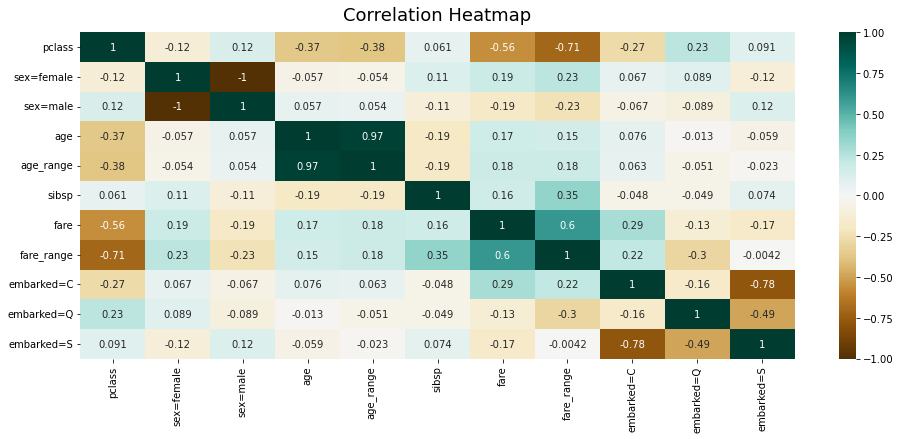

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data6.drop('survived', axis=1).corr(), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG') # method='spearman' / kendall 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#### Correlaciones con la variable respuesta
2) Eliminar las variables menos correladas con la variable respuesta

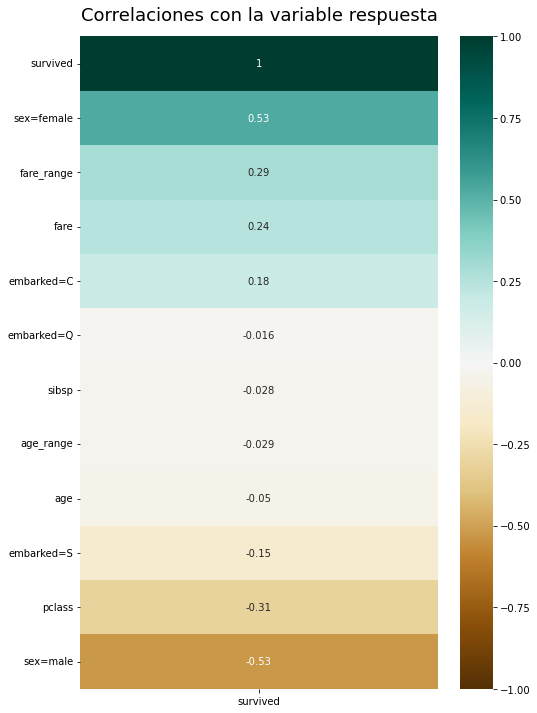

In [112]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data6.corr()[['survived']].sort_values(by='survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones con la variable respuesta', fontdict={'fontsize':18}, pad=16);

Volvemos a separar los predictores de la variable respuesta.

In [113]:
X_titanic = data6.drop('survived', axis=1)
X_titanic

,pclass,sex=female,sex=male,age,age_range,sibsp,fare,fare_range,embarked=C,embarked=Q,embarked=S
0,0.0,1.0,0.0,0.361169,0.285714,0.000,0.412503,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.009395,0.000000,0.125,0.295806,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.022964,0.000000,0.125,0.295806,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.373695,0.285714,0.125,0.295806,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.311064,0.285714,0.125,0.295806,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,1.0,0.0,0.179540,0.142857,0.125,0.028213,0.6,1.0,0.0,0.0
1305,1.0,1.0,0.0,0.372206,0.285714,0.125,0.028213,0.6,1.0,0.0,0.0
1306,1.0,0.0,1.0,0.329854,0.285714,0.000,0.014102,0.0,1.0,0.0,0.0
1307,1.0,0.0,1.0,0.336117,0.285714,0.000,0.014102,0.0,1.0,0.0,0.0


In [114]:
y_titanic = data6['survived']
y_titanic

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: survived, Length: 1309, dtype: float64

#### Modelo base

Antes de empezar a eliminar características, vamos a obtener un modelo de base, o de referencia, que nos permita valorar las mejoras que vamos obteniendo.

In [115]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

strat_cv = StratifiedKFold(5, shuffle=True, random_state=2345)

dt = DecisionTreeClassifier(random_state=2345)

cross_val_score(dt, X_titanic, y_titanic, cv=strat_cv, scoring='balanced_accuracy')

array([0.71888889, 0.76635802, 0.76932099, 0.70240741, 0.74130435])

### Métodos de envoltura

Los métodos de envoltura usan el rendimiento de un modelo predictivo cómo indicador de la bondad de un conjunto de atributos.

La librería `mlxtend` de Python, proporciona diferentes algoritmos y herramientas de aprendizaje automático que quedan fuera del alcance de Scikit-learn, como por ejemplo, los métodos de selección de características de tipo envoltura.
- https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [116]:
#  !pip install mlxtend

In [117]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

dt = DecisionTreeClassifier(random_state=2354)

sbs = SFS(dt, k_features=1, forward=False, floating=False, 
          scoring='balanced_accuracy',cv=strat_cv) #verbose=2

sbs = sbs.fit(X_titanic, y_titanic)

Con el parámetro `k_features` indicamos el número de características a retener antes de parar. Con el parámetro `forward=False` indicamos que la búsqueda es hacia atrás.

Una vez que ha terminado la ejecución, podemos consultar los mejores subconjuntos para cada número posible de características.

In [118]:
sbs.subsets_

{11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  'cv_scores': array([0.71580247, 0.73901235, 0.76623457, 0.69814815, 0.75940994]),
  'avg_score': 0.7357214937504792,
  'feature_names': ('pclass',
   'sex=female',
   'sex=male',
   'age',
   'age_range',
   'sibsp',
   'fare',
   'fare_range',
   'embarked=C',
   'embarked=Q',
   'embarked=S')},
 10: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 9, 10),
  'cv_scores': array([0.77709877, 0.79253086, 0.77858025, 0.72475309, 0.74546584]),
  'avg_score': 0.763685760294456,
  'feature_names': ('pclass',
   'sex=female',
   'sex=male',
   'age_range',
   'sibsp',
   'fare',
   'fare_range',
   'embarked=C',
   'embarked=Q',
   'embarked=S')},
 9: {'feature_idx': (0, 1, 2, 4, 5, 6, 8, 9, 10),
  'cv_scores': array([0.77209877, 0.79253086, 0.78166667, 0.73092593, 0.75857143]),
  'avg_score': 0.7671587301587303,
  'feature_names': ('pclass',
   'sex=female',
   'sex=male',
   'age_range',
   'sibsp',
   'fare',
   'embarked=C',
   'embarked=

Podemos observar que el mejor subconjunto encontrado, tiene 8 variables.

In [119]:
seleccion = ['pclass', 'sex=female', 'sex=male', 'age_range', 'sibsp', 'fare', 'embarked=C', 'embarked=Q']
seleccion

['pclass',
 'sex=female',
 'sex=male',
 'age_range',
 'sibsp',
 'fare',
 'embarked=C',
 'embarked=Q']

Hagamos un último experimento con la selección de variables obtenida.

In [120]:
strat_cv = StratifiedKFold(5, shuffle=True, random_state=2345)

dt = DecisionTreeClassifier(random_state=2345)

cross_val_score(dt, X_titanic[seleccion], y_titanic, cv=strat_cv, scoring='balanced_accuracy').mean()

0.7651663982823403

## ANEXO: Ingeniería de características

Vamos a crear nuevas características a partir de los datos existentes. Esto es lo que se conoce como `ingeniería de características`.

In [121]:
titanic_path = ('./titanic.csv')
df = pd.read_csv(titanic_path)

In [122]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [123]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Ingeniería de características

Algunas variables como cabin parecen inservibles a priori debido al número de missings o debido a su heterogeneidad como el campo nombre. Sin embargo, es posible extraer información a partir de estas, por lo que vamos a crear nuevas variables:

- Título: extraída del nombre
- Mujer casada: Extraída del nombre
- Cubierta: extraída del camarote (cabin)
- Familiares: a partir de parch y sibsp
- Viaja solo: a partir del número de familiares

Si alguna de estas variables tuviese valores perdidos, sería conveniente imputarlos antes de iniciar esta fase de extracción de características. Como hemos seleccionado variables sin valores perdidos, podemos realizar esta fase primero y luego todo el preprocesado de una vez.

#### Título

In [124]:
df['title'] = df['name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss


In [125]:
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

#### Casada

In [126]:
df['is_married'] = 0
df['is_married'] = df['title'].apply(lambda s: 1 if s == 'Mrs' else 0)
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,is_married
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0


#### Cubierta

In [127]:
df['deck'] = df['cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'U')
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,is_married,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,C


#### Familiares

In [128]:
df['relatives'] = df['parch'] + df['sibsp']
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,is_married,deck,relatives
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0,B,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0,C,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,C,3


#### Viaja solo

In [129]:
df['alone'] = 0
df['alone'] = df['relatives'].apply(lambda v: 1 if v == 0 else 0)
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,is_married,deck,relatives,alone
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0,B,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0,C,3,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,C,3,0


Finalmente, implementamos el conjunto de transformaciones necesarias. Mantenemos versiones discretizadas de la edad y la tarifa, manteniendo las originales.

In [130]:
from sklearn.preprocessing import KBinsDiscretizer

impohe = Pipeline([('si3', SimpleImputer(strategy='most_frequent')),
                   ('onehot', OneHotEncoder())])

impdisc_age = Pipeline([("si1", SimpleImputer(strategy='mean')),
                   ('disc1', KBinsDiscretizer(8, strategy='uniform', encode='ordinal'))])

impdisc_fare = Pipeline([("si2", SimpleImputer(strategy='median')),
                   ('disc2', KBinsDiscretizer(6, strategy='quantile', encode='ordinal'))])

ct = ColumnTransformer([("ohe",OneHotEncoder(),['sex', 'deck', 'title']),
                        ("si1",SimpleImputer(strategy='mean'),['age']), # age
                        ("disc_age",impdisc_age,['age']), # age_range
                        ("si2",SimpleImputer(strategy='median'),['fare']), # fare
                        ("disc_fare",impdisc_fare,['fare']), # fare_range
                        ("impohe",impohe,['embarked']),
                        ("original",'passthrough',['pclass', 'sibsp', 'parch', 'is_married', 'relatives', 'alone', 'survived'])])

npdata = ct.fit_transform(df)
npdata

array([[1., 0., 0., ..., 0., 1., 1.],
       [0., 1., 0., ..., 3., 0., 1.],
       [1., 0., 0., ..., 3., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

Venamos una fila:

In [131]:
print(len(npdata[0,:]))
npdata[0,:]

43


array([  1.    ,   0.    ,   0.    ,   1.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   1.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,  29.    ,
         2.    , 211.3375,   5.    ,   0.    ,   0.    ,   1.    ,
         1.    ,   0.    ,   0.    ,   0.    ,   0.    ,   1.    ,
         1.    ])

Finalmente, separamos los predictores de la variable respuesta.

In [132]:
X_titanic = npdata[:,:-1]
X_titanic[0,:]

array([  1.    ,   0.    ,   0.    ,   1.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   1.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,  29.    ,
         2.    , 211.3375,   5.    ,   0.    ,   0.    ,   1.    ,
         1.    ,   0.    ,   0.    ,   0.    ,   0.    ,   1.    ])

In [133]:
y_titanic = npdata[:,-1]
y_titanic

array([1., 1., 0., ..., 0., 0., 0.])

Por último, escalamos los datos.

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_titanic)
X_titanic_escalado = scaler.transform(X_titanic)

Veamos como ha quedado el primer registro de nuestro conjunto de datos tras aplicar la transformación.

In [135]:
X_titanic_escalado[0,:]

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.36116884,
       0.28571429, 0.41250333, 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        ])

In [ ]:
# HISTORIA

# La empresa organizadora del viaje espacial, pidió antes de saber el triste destino de los pasajeros, 
# que analisaramos a los tripulantes de la nave para  poder decidir que tipo de ofertas y productos venderles 
# a la llegada a su destino final.
# Para ello, decidimos aplicar kmeans, un algoritmo de aprendizaje no supervisado, con el que podemos dividir a la población en 
# distintos grupos según sus consumo en la nave y según su edad.
# Personificando posteriormente a estos grupos en un individuo "medio" con el que su agencia publicitaria decidirá que productos
# ofrecer para hacer un mejor negocio. (como por ejemplo puede ser los hoteles para hospedarse, cerca de que tiendas poner las habitaciones,
# por que tiendas pasar en las rutas turísticas...)